## Введение в нейронные сети
### Урок 2. Keras


1. Попробуйте обучить, нейронную сеть на Keras (рассмотренную на уроке) на датасете MNIST с другими параметрами. Напишите в комментарии к уроку:
2. Какого результата вы добились от нейросети?
3. Что помогло вам улучшить её точность?
4. Поработайте с документацией Keras. Попробуйте найти полезные команды Keras, неразобранные на уроке.

In [1]:
import numpy as np
import pandas as pd

from keras.datasets import fashion_mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

%matplotlib inline

2023-09-17 00:19:36.221711: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-17 00:19:36.479506: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-17 00:19:36.480881: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 00:19:37.872848: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

In [3]:
print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


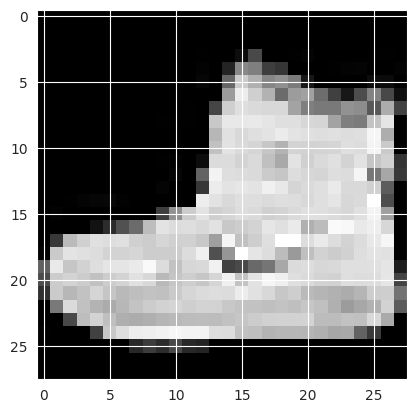

In [4]:
plt.imshow(X_train[0], cmap='gray')

In [5]:
y_train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
X_train = (X_train / 255)
X_test = (X_test / 255)

X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

In [7]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid')
])
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
loss, metric = model.evaluate(X_test, y_test, batch_size=64)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.9480 - accuracy: 0.6922 - val_loss: 0.6828 - val_accuracy: 0.7573
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.5940 - accuracy: 0.7932 - val_loss: 0.5798 - val_accuracy: 0.8016


In [9]:
loss

0.4973938465118408

In [10]:
metric

0.8259000182151794

Попробуем затюнить параметры

In [11]:
params = {
    'batch_size': [64, 128, 256],
    'epochs': [10, 20, 30],
    'optimizer': ['SGD', 'Adam', 'RMSprop'] 
}

In [12]:
def build_clf():
    model = Sequential([
        Dense(64, input_shape=(28 * 28,), activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='sigmoid')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [13]:
model = KerasClassifier(build_clf)
cv = GridSearchCV(model, params, refit=False, scoring='accuracy', n_jobs=5)

In [14]:
cv_result = cv.fit(X_train, y_train)

2023-09-17 00:20:01.616673: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-17 00:20:01.653452: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-17 00:20:01.707959: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-17 00:20:01.708416: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 00:20:01.708691: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-17 00:20:01.709390: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instru

Epoch 1/10
Epoch 1/10
750/750 [==============================] - 6s 6ms/step - loss: 0.5878 - accuracy: 0.7993
Epoch 2/10
750/750 [==============================] - 7s 7ms/step - loss: 0.5763 - accuracy: 0.8005
Epoch 2/10
750/750 [==============================] - 5s 7ms/step - loss: 0.4107 - accuracy: 0.8521
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.4155 - accuracy: 0.8517
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3691 - accuracy: 0.8683
Epoch 4/10
750/750 [==============================] - 5s 7ms/step - loss: 0.4052 - accuracy: 0.8553
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3721 - accuracy: 0.8656
Epoch 4/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3685 - accuracy: 0.8674
Epoch 4/10
750/750 [==============================] - 5s 6ms/step - loss: 0.3471 - accuracy: 0.8745
Epoch 5/10
750/750 [==============================] - 5s 6ms/step - loss: 0.3640 - accura

In [18]:
cv_result.best_params_

{'batch_size': 256, 'epochs': 30, 'optimizer': 'Adam'}

In [24]:
# Проверим лучшие параметры
model = build_clf()
model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=256,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
loss, metric = model.evaluate(X_test, y_test, batch_size=256)

Epoch 1/30
235/235 [==============================] - 2s 5ms/step - loss: 0.6826 - accuracy: 0.7732 - val_loss: 0.5261 - val_accuracy: 0.8178
Epoch 2/30
235/235 [==============================] - 1s 5ms/step - loss: 0.4398 - accuracy: 0.8481 - val_loss: 0.4568 - val_accuracy: 0.8412
Epoch 3/30
235/235 [==============================] - 1s 5ms/step - loss: 0.4020 - accuracy: 0.8601 - val_loss: 0.4349 - val_accuracy: 0.8473
Epoch 4/30
235/235 [==============================] - 1s 4ms/step - loss: 0.3751 - accuracy: 0.8672 - val_loss: 0.4459 - val_accuracy: 0.8420
Epoch 5/30
235/235 [==============================] - 1s 4ms/step - loss: 0.3574 - accuracy: 0.8742 - val_loss: 0.3953 - val_accuracy: 0.8578
Epoch 6/30
235/235 [==============================] - 1s 4ms/step - loss: 0.3411 - accuracy: 0.8786 - val_loss: 0.3977 - val_accuracy: 0.8612
Epoch 7/30
235/235 [==============================] - 1s 5ms/step - loss: 0.3323 - accuracy: 0.8814 - val_loss: 0.3903 - val_accuracy: 0.8580
Epoch 

In [25]:
loss

0.34578555822372437

In [26]:
metric

0.8816999793052673

**Удалось добиться улучшения модели путем увеличения количества эпох и размера блока итерации**